##### Recordatorio

+ Población => Todos los elementos (normalmente desconocido)
+ Muestra => Subconjunto de la población

# Hipótesis

+ **H0**

Hipótesis nula. (H0). H0 es el status quo, el mainstream, la hipótesis a vencer por el investigador.


+ **H1**

Hipótesis alternativa. (H1). H1 es la nueva hipótesis, la del investigador.

# Tipos de tests

**1)** (one-side)

$$H0: \mu \geq k$$
$$H1: \mu < k$$

**2)** (one-side)

$$H0: \mu \leq k$$
$$H1: \mu > k$$

**3)** (two-side)

$$H0: \mu = k$$
$$H1: \mu ≠ k$$

# Suposiciones para el testeo

**1)**

Observaciones independientes. (Para evitar sesgos)

**2)**

Normalidad de los datos. ($N(\mu, \sigma)$)

Teorema Central del Limite

**3)**

Tamaño adecuado de la muestra. (30)

**4)**

Para usar la $N(\mu, \sigma)$, debemos conocer $\sigma$ (desviacion estandar de la poblacion).Si $\sigma$ es desconocida, se usa la t-Student para el testeo de hipotesis, lo que implica usar s (desviacion estandar muestral, n-1).

# Test (estadistico)

+ $N(\mu, \sigma)$ , $Z-test$

$$z=\frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

donde:
+ $\bar{x}$ es la media muestral
+ $\mu$ es la media poblacional
+ $\sigma$ es la std poblacional
+ $\sqrt{n}$ es la raiz de n=tamaño de la muestra
+ $\frac{\sigma}{\sqrt{n}}$ se le llama error estandar

+ t-Student , $t-test$

$$t=\frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$

donde:
+ $\bar{x}$ es la media muestral
+ $\mu$ es la media poblacional
+ $s$ es la std muestral
+ $\sqrt{n}$ es la raiz de n=tamaño de la muestra
+ $\frac{s}{\sqrt{n}}$ se le llama error estandar muestral

# P-value

**p-value** = es la probabilidad correspondiente al estadistico de ser posible bajo H0.

$$pvalue > umbral => H0$$
$$pvalue < umbral => H1$$

El umbral esta determinado por el intervalo de confianza.

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
x=[i*.1 for i in range(-60, 60)]

y1=[norm.pdf(x, -2, 1) for x in x]
y2=[norm.pdf(x, 2, 1) for x in x]

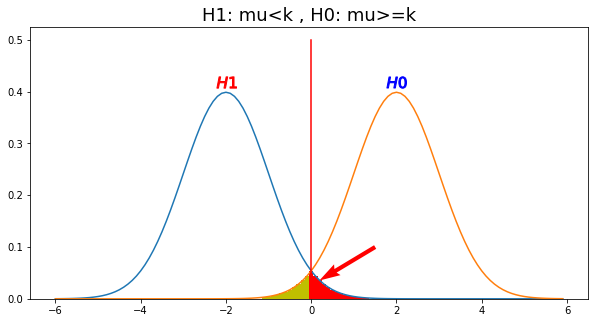

In [3]:
%matplotlib inline

plt.figure(figsize=(10, 5))
plt.plot(x, y1)
plt.plot(-2, max(y1)+.02, marker='$H1$', color='red', ms=20)
plt.plot(x, y2)
plt.plot(2, max(y2)+.02, marker='$H0$', color='blue', ms=20)

plt.quiver(1.5, 0.1, -1, -0.6, color='r', scale=10)  # para pintar una flecha

for i in range(49, 74):
    if y1[i]<=y2[i]:
        plt.bar(x[i], y1[i], width=0.1, color='r')
    else:
        plt.bar(x[i], y2[i], width=0.1, color='y')
        
plt.plot([0,0], [0, 0.5], color='r')
plt.title('H1: mu<k , H0: mu>=k', fontsize=18);

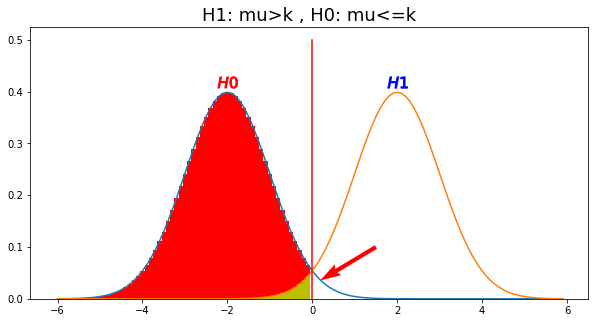

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(x, y1)
plt.plot(-2, max(y1)+.02, marker='$H0$', color='red', ms=20)
plt.plot(x, y2)
plt.plot(2, max(y2)+.02, marker='$H1$', color='blue', ms=20)

plt.quiver(1.5, 0.1, -1, -0.6, color='r', scale=10)  # para pintar una flecha

for i in range(74):
    if y1[i]>y2[i]:
        plt.bar(x[i], y1[i], width=0.1, color='r')
        plt.bar(x[i], y2[i], width=0.1, color='y')
        
plt.plot([0,0], [0, 0.5], color='r')
plt.title('H1: mu>k , H0: mu<=k', fontsize=18);

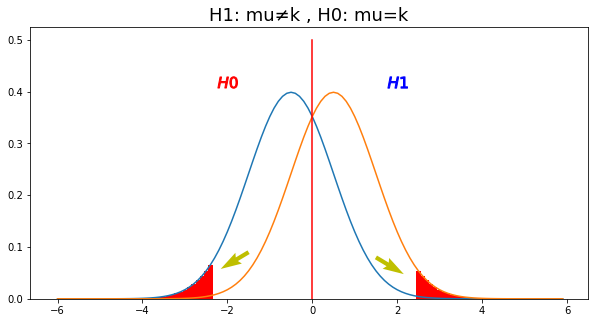

In [5]:
y1=[norm.pdf(x, -.5, 1) for x in x]
y2=[norm.pdf(x, .5, 1) for x in x]

plt.figure(figsize=(10, 5))
plt.plot(x, y1)
plt.plot(-2, max(y1)+.02, marker='$H0$', color='red', ms=20)
plt.plot(x, y2)
plt.plot(2, max(y2)+.02, marker='$H1$', color='blue', ms=20)

plt.quiver(1.5, 0.08, 1, -0.6, color='y', scale=20)  # para pintar una flecha
plt.quiver(-1.5, 0.09, -1, -0.6, color='y', scale=20)

for i in range(85, 100):
    if y1[i]<=y2[i]:
        plt.bar(x[i], y2[i], width=0.1, color='r')

for i in range(37):
    if y1[i]>=y2[i]:
        plt.bar(x[i], y1[i], width=0.1, color='r')
        
plt.plot([0,0], [0, 0.5], color='r')
plt.title('H1: mu≠k , H0: mu=k', fontsize=18);

# Ejemplo estudio farmaceutico

Supongamos que una compañia farmaceutica crea un medicamento para manejar la diabetes.

Se sabe que cualquier nivel de hemoglobina A1c por debajo del 5,7% es considerado normal.
La compañia realiza un estudio de un nuevo medicamento con 100 voluntarios.

+ Hipotesis:
$$H0: \mu \geq 5.7$$
$$H1: \mu < 5.7$$


Los resultados del estudio son $\bar{x}=5.1$, $s=1.6$


¿La prueba es suficiente para rechazar H0?

In [6]:
import numpy as np
from scipy.stats import t

In [7]:
# A mano

mu=5.7

mu_hat=5.1     # media del estudio
std_hat=1.6    # std del estudio

n=100

In [8]:
t_test=(mu_hat-mu)/(std_hat/np.sqrt(n))

t_test

-3.750000000000003

In [9]:
dof=n-1   # grados de libertad

dof

99

In [10]:
#help(t)

In [11]:
p_value=t(df=dof).cdf(t_test)

p_value

0.0001489332089038242

In [12]:
# lo mismo, bueno casi....scipy

from scipy.stats import ttest_1samp

In [13]:
pacientes=np.random.normal(5.1, 1.6, 100)

In [14]:
test=ttest_1samp(pacientes, 5.7)

test.statistic

-3.0386161830313005

In [15]:
test.pvalue

0.0030396539160685208

**Conclusion:**

Si buscamos un intervalo de confianza del 99,99%, entonces $umbral=0.001$

El pvalor obtenido es menor que el umbral, por lo tanto podemos rechazar H0.

# Ejemplo Altura

Estudio media altura humana, 100 individuos.

+ Hipotesis:
$$H0: \mu \leq 1.7$$
$$H1: \mu > 1.7$$


Los resultados del estudio son $\bar{x}=1.72$, $s=0.2$


¿La prueba es suficiente para rechazar H0?

In [16]:
# A mano

t_test=(1.72-1.7)/(0.2/np.sqrt(100))

p_value=1-t(df=99).cdf(t_test)

p_value

0.15987423706965065

In [17]:
# scipy

test=ttest_1samp(np.random.normal(1.72, 0.2, 100), 1.7)

test.statistic

1.001825171910932

In [18]:
test.pvalue

0.3188704420743202

**Conclusion**

Si buscamos un intervalo de confianza del 95%, entonces $umbral=0.05$

El pvalor obtenido es mayor que el umbral, por lo tanto no podemos rechazar H0.

**OJO**

Si buscamos un intervalo de confianza del 80%, entonces $umbral=0.2$

El pvalor obtenido es menor que el umbral, por lo tanto podemos rechazar H0.

# Z-test  

$N(\mu, \sigma)$

supongamos $\sigma=0.25$ , std de la poblacion

In [19]:
from statsmodels.stats import weightstats as w

z_score, p_value=w.ztest(np.random.normal(1.72, 0.25, 100), value=1.7)
print (z_score, p_value)

-0.7822284560391124 0.4340803239419243


# Testeo de hipotesis con 2 muestras

Ya no se estudia una muestra frente a la poblacion, sino que se comparan dos muestras entre si.

En primer lugar, se considera la diferencia de medias:

$$\mu=\mu_1 - \mu_2$$

El tipo de test cambia:

**1)** 

$$H0: \mu \geq 0$$
$$H1: \mu < 0$$
    
    
**2)** 

$$H0: \mu \leq 0$$
$$H1: \mu > 0$$
    
    
**3)** 

$$H0: \mu = 0$$
$$H1: \mu ≠ 0$$

Por otro lado hay que considerar la independencia de las muestras.

Si son dependientes (matched pairs), entonces se usa el t-test:

+ Welch's t-test


$$t=\frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{s_1^2}{n_1^2}+\frac{s_2^2}{n_2^2}}}$$

In [20]:
import pandas as pd
from scipy.stats import ttest_ind, ttest_rel

**Hipotesis**

$H0: \mu=0$    (media de las diferencias), (no hay diferencia significativa entre las muestras)

$H1: \mu≠0$   (existe una diferencia significativa entre las muestras)

In [21]:
b_pres=pd.read_csv('../data/blood_pressure.csv')

b_pres.head()

,before,after
0,136.713072,92.432965
1,134.735618,105.022643
2,127.529115,82.242766
3,144.527126,93.607172
4,124.214720,103.212223


In [22]:
ttest_rel(b_pres.before, b_pres.after)

Ttest_relResult(statistic=27.291841767560236, pvalue=7.303035069608042e-48)

In [23]:
ttest_1samp(b_pres.before-b_pres.after, 0)

Ttest_1sampResult(statistic=27.291841767560236, pvalue=7.303035069608042e-48)

**Conclusion**

El p_Value tiende a cero. Podemos rechazar H0.

### independencia

In [24]:
ab_test=pd.read_csv('../data/ab_test.csv')

ab_test.head()

,a,b
0,0.27,13.61
1,6.08,21.53
2,13.74,9.23
3,9.70,5.36
4,7.00,12.90


In [25]:
ttest_ind(ab_test.a, ab_test.b)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009713140852447347)

In [26]:
ttest_ind(ab_test.a, ab_test.b, equal_var=True)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009713140852447347)

In [27]:
ttest_ind(ab_test.a, ab_test.a)

Ttest_indResult(statistic=0.0, pvalue=1.0)

**Test de independencia**

+ H0 : Completa dependencia (son lo mismo)
+ H1 : son independientes


**Conclusion**

Son independientes, el pvalor es menor que el umbral, por lo que podemos rechazar H0.
Al ser independientes, ya no se usa el t-test, se usa el z-test.

In [28]:
z_score, p_value=w.ztest(ab_test.a, ab_test.b,
                         value=0, 
                         alternative='two-sided',
                         usevar='pooled',
                         ddof=1)

print (z_score, p_value)

-2.637533181209767 0.008351145504323936


**Conclusion**

El p_value es menor que el umbral, dependiendo del intervalo de confianza, pero siendo asi podemos rechazar H0, y decir que existe una diferencia significativa entre ambas muestras, una pagina web funciona mejor que otra.

# ANOVA

### testeo de más de dos muestras

**ANOVA** = Análisis de la varianza, es una técnica que permite comparar tres o más medias de distintas muestras independientes.


Las hipótesis son:

$H0 : \mu_1=\mu_2=\mu_3=\ldots=\mu_n$

$H1 :$ Al menos una es diferente

Los p_values se sacan con el F-test (F de Snedecor), comparando varianzas. Lo que se busca es una diferencia significativa en al menos uno de los grupos.

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

from scipy.stats import f_oneway, norm, f, chi2, chi2_contingency

import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.simplefilter('ignore')

##### F de Snedecor

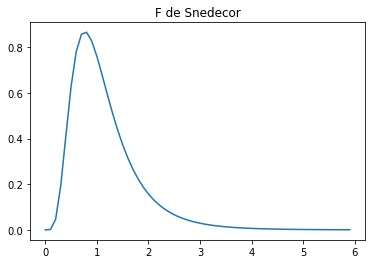

In [30]:
x=[i*.1 for i in range(60)]

plt.plot(x, f(15, 15).pdf(x))
plt.title('F de Snedecor');

##### F-test

In [31]:
x=[i*.1 for i in range(-60, 60)]

y1=[norm.pdf(x, -3, 1) for x in x]
y2=[norm.pdf(x, 1, 2) for x in x]
y3=[norm.pdf(x, 4, 1.5) for x in x]

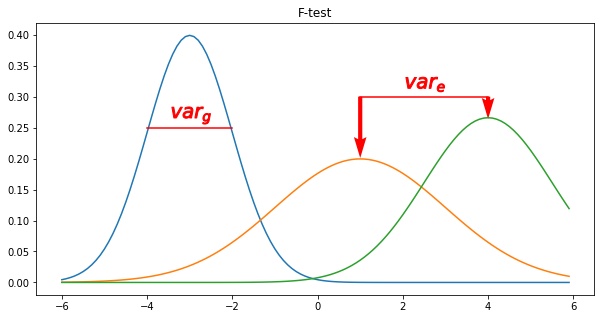

In [32]:
plt.figure(figsize=(10,5))

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

plt.plot(-3, 0.27, marker='$var_g$', color='r', ms=40)
plt.plot(2.5, 0.32, marker='$var_e$', color='r', ms=40)

plt.plot([-4,-3,-2], [.25, .25, .25], color='r')
plt.plot([1,2,3,4], [.3, .3, .3, .3], color='r')

plt.quiver(1, 0.3, 0, -1.1, color='r', scale=10)
plt.quiver(4, 0.3, 0, -0.4, color='r', scale=10)

plt.title('F-test');

$F-test =$ Varianza entre los grupos / Varianza del grupo

$F-test = \frac{\sigma_e^2}{\sigma_g^2}$

# Ejemplo Plantas

**ANOVA One-Way** : Una variable independiente y una dependiente, similaridad basada en la media y en el f_score.


Supongamos que tenemos dos fertilizantes distintos y probamos su eficacia. Se tienen 3 grupos, el grupo de control (no se aplica fertilizante), y un grupo para cada uno de los fertilizantes.

Las hipótesis son:

$H0 : \mu_1=\mu_2=\mu_3$  (no hay diferencia significativa entre los grupos)

$H1 :$ Al menos una es diferente  (existe diferencia significativa en al menos un grupo)

In [33]:
df=pd.read_csv('../data/PlantGrowth.csv')
df.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [34]:
df.group.unique()

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [35]:
df=df[['weight', 'group']]

grupos=df.group.unique()

In [36]:
data={g : df.weight[df.group==g] for g in grupos}

data

{'ctrl': 0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64,
 'trt1': 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64,
 'trt2': 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64}

In [37]:
f_score, p_value = f_oneway(data['ctrl'], data['trt1'], data['trt2'])

print (f_score, p_value)

4.846087862380136 0.0159099583256229


**Conclusion**

$p_v < 0.05$, se rechaza H0. Existe una diferencia significativa en al menos un grupo.

In [38]:
data['ctrl'].mean()

5.031999999999999

In [39]:
data['trt1'].mean()

4.661

In [40]:
data['trt2'].mean()

5.526

# Ejemplo Ciudades

Se tiene un rating de 6 ciudades diferentes.

Las hipótesis son:

$H0 : \mu_1=\ldots=\mu_6$  (no hay diferencia significativa entre las ciudades)

$H1 :$ Al menos una es diferente  (existe diferencia significativa en al menos una ciudad)

In [41]:
rate=pd.read_csv('../data/rate_by_city.csv')

rate.head()

,Rate,City
0,13.75,1
1,13.75,1
2,13.50,1
3,13.50,1
4,13.00,1


In [42]:
rate.City.unique()

array([1, 2, 3, 4, 5, 6])

In [43]:
rate['city_count']=rate.groupby('City').cumcount()

rate.head()

,Rate,City,city_count
0,13.75,1,0
1,13.75,1,1
2,13.50,1,2
3,13.50,1,3
4,13.00,1,4


In [44]:
rate_pivot=rate.pivot(columns='City', values='Rate', index='city_count')
rate_pivot

City,1,2,3,4,5,6
city_count,,,,,,
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00
5,13.00,12.40,13.25,12.97,13.25,12.00
6,13.00,12.30,13.00,12.50,13.00,12.00
7,12.75,11.90,12.50,12.25,12.50,11.90
8,12.50,11.90,12.50,11.89,12.45,11.90


In [45]:
# f_oneway(rate_pivot[1], rate_pivot[2].....

f_oneway(*[rate_pivot[i] for i in range(1, 7)])  # entrada n muestras

F_onewayResult(statistic=4.8293848737024, pvalue=0.001174551414504048)

**Conclusion**

$p_v < 0.05$, se rechaza H0. Existe uns diferencia significativa en al menos una ciudad.

In [46]:
# con statsmodels

formula='Rate ~ C(City)'

modelo=ols(formula=formula, data=rate).fit()

anova_table=sm.stats.anova_lm(modelo, typ=1)

anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(City),5.0,10.945667,2.189133,4.829385,0.001175
Residual,48.0,21.758133,0.453294,NaN,NaN


In [47]:
modelo

##### F-test a mano

In [48]:
data=np.array([[1,2,3], [4,5,6], [7,8,9]]).T
data

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [49]:
n=data.shape[0]
m=data.shape[1]

media=data.mean()

col_medias=data.mean(axis=0)

s_c_entre_grupos=(((col_medias-media)**2)*n).sum()
dof_sceg=m-1

s_c_grupo=((data-col_medias)**2).sum()
dof_scg=m*(n-1)

In [50]:
f_score=(s_c_entre_grupos/dof_sceg)/(s_c_grupo/dof_scg)
f_score

27.0

In [51]:
1 - f(dof_sceg, dof_scg).cdf(f_score)  # p_value

0.0010000000000000009

##### con scipy

In [52]:
f_oneway(data[:, 0], data[:, 1], data[:, 2])

F_onewayResult(statistic=27.0, pvalue=0.0010000000000000002)

# Ejemplo Campo


**ANOVA Two-Way** : Dos variables independientes categoricas y una dependiente continua.


Supongamos que se tienen datos de produccion de un campo, y ademas los datos del tipo de fertilizante y cantidad de agua usada.


Las hipótesis son:

$H0 : \mu_1=\mu_2=\ldots=\mu_n$  (no hay diferencia significativa entre campos)

$H1 :$ Al menos una es diferente  (existe diferencia significativa en al menos un campo)

In [53]:
df=pd.read_csv('../data/crop_yield.csv')
df.head()

,Fert,Water,Yield
0,A,High,27.4
1,A,High,33.6
2,A,High,29.8
3,A,High,35.2
4,A,High,33.0


In [54]:
df.Fert.unique()

array(['A', 'B'], dtype=object)

In [55]:
df.Water.unique()

array(['High', 'Low'], dtype=object)

In [56]:
df.Yield.unique()

array([27.4, 33.6, 29.8, 35.2, 33. , 34.8, 27. , 30.2, 30.8, 26.4, 32. ,
       32.2, 26. , 33.4, 26.8, 23.2, 29.4, 19.4, 23.8])

In [57]:
modelo=ols('Yield ~ C(Fert)+C(Water)', df).fit()
modelo.fvalue

5.430482726711912

In [58]:
modelo.f_pvalue

0.015008885925143397

In [59]:
res=sm.stats.anova_lm(modelo, typ=2)
res

,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.669070,0.029228
C(Water),63.368,1.0,5.191895,0.035887
Residual,207.488,17.0,NaN,NaN


# MANOVA (ANOVA Multivariante)

In [60]:
from statsmodels.multivariate.manova import MANOVA

In [61]:
df=pd.read_csv('../data/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [62]:
df.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [63]:
df.columns=df.columns.str.replace('.', '_')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [64]:
manova=MANOVA.from_formula('sepal_length + sepal_width + petal_length + petal_width ~ C(variety)',
                           data=df)

print (manova.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2086.7720 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2086.7720 0.0000
 Hotelling-Lawley trace 57.9659 4.0000 144.0000 2086.7720 0.0000
    Roy's greatest root 57.9659 4.0000 144.0000 2086.7720 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
       C(variety)        Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0234 8.0000 288.0000  199.1453 0.0000
         Pillai's trace  1.1919 8.0000 290.00

# $\chi^2$

**ji-dos, chi-dos, chi-cuadrado..., para una poblacion que tenga dos variables categoricas**

**¿Existe asociacion significativa entre las dos?  (H0: No, H1: Si)**

In [65]:
df=pd.read_csv('../data/chi-test.csv')
df.head()

,Gender,Like Shopping?
0,Male,No
1,Female,Yes
2,Male,Yes
3,Female,Yes
4,Female,Yes


In [66]:
contin_table=pd.crosstab(df.Gender, df['Like Shopping?'])
contin_table

Like Shopping?,No,Yes
Gender,,
Female,2,3
Male,2,2


In [67]:
chi2_contingency(contin_table)

(0.1406249999999999,
 0.7076604666545525,
 1,
 array([[2.22222222, 2.77777778],
        [1.77777778, 2.22222222]]))

In [68]:
chi_2, pval, dof, ex = chi2_contingency(contin_table)

pval

0.7076604666545525

In [69]:
# a mano

chi_square=([(f-e)**2./e for f,e in zip(contin_table.values, ex)])

chi_statistic=sum(chi_square)

p_value=1-chi2.cdf(x=chi_statistic, df=dof)
p_value

array([0.82306327, 0.84148058])

**Conclusion**

$p_v > 0.05$, no se rechaza H0, no existe asociacion significativa entre los grupos.

# Regresion Lineal

**Ecuacion de la recta**

$$y = m·x+b$$

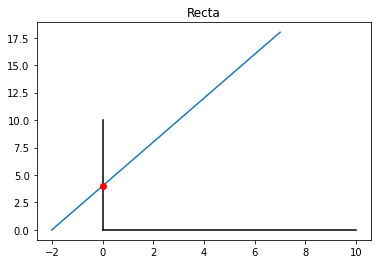

In [70]:
x=[i for i in range(-2, 8)]

m=2
b=4

y=[m*x+b for x in x]

plt.plot(x, y)
plt.plot([0,0], [0,10], color='black')
plt.plot([0,10], [0,0], color='black')
plt.plot(0, b, 'ro')
plt.title('Recta');

**Generalizacion de la ecuacion de la recta**

$$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\ldots+\beta_nx_n$$

El objetivo de la regresion lineal es obtener los $\beta$:
+ Algebraicamente
+ Minimos cuadrados

In [71]:
from scipy.stats import linregress

In [72]:
auto=pd.read_csv('../data/auto-mpg.csv')
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


In [73]:
linreg=linregress(auto.acceleration, auto.mpg)
linreg

LinregressResult(slope=1.1912045293502274, intercept=4.9697930042539085, rvalue=0.4202889121016507, pvalue=1.8230915350787203e-18, stderr=0.12923643283101396)

In [74]:
R2=linreg[2]**2
R2

0.17664276963558906

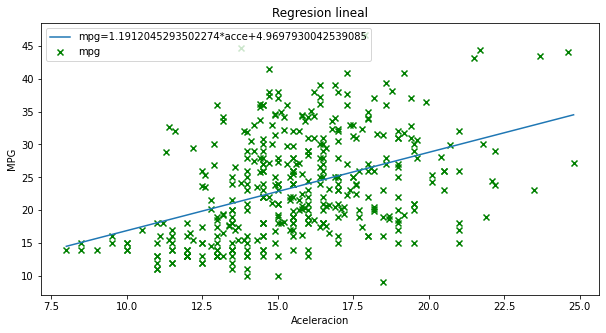

In [75]:
# plot

x=np.linspace(auto.acceleration.min(), auto.acceleration.max(), 50)
y=linreg[1]+linreg[0]*x

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='mpg={}*acce+{}'.format(linreg[0], linreg[1]))
plt.scatter(auto.acceleration, auto.mpg, marker='x', c='g', label='mpg')

plt.title('Regresion lineal')
plt.xlabel('Aceleracion')
plt.ylabel('MPG')
plt.legend()
plt.show();

In [76]:
# linreg con statsmodels
import warnings
warnings.simplefilter('ignore')

x=sm.add_constant(auto.acceleration)
y=auto.mpg
modelo=sm.OLS(y, x).fit()

In [77]:
pred=modelo.predict(x)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           1.82e-18
Time:                        21:26:06   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.9698      2.043      2.432      0.015       0.953       8.987
acceleration     1.1912      0.129      9.217      0.000       0.937       1.445
==============================================================================
Omnibus:                       17.459   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.214
Skew:                           0.497   Prob(JB):                     0.000111
Kurtosis:                       2.670   Cond. No.                         91.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# varias variables

x=sm.add_constant(auto[[
    #'acceleration',
    #'cylinders',
    'weight',
    #'horse_power',
    'model_year',
    #'displacement'
]].apply(lambda x: x.fillna(x.mean()))

)

y=auto.mpg

In [91]:
modelo=sm.OLS(y, x).fit()
pred=modelo.predict(x)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     819.5
Date:                Thu, 26 Nov 2020   Prob (F-statistic):          3.33e-140
Time:                        21:29:14   Log-Likelihood:                -1037.6
No. Observations:                 392   AIC:                             2081.
Df Residuals:                     389   BIC:                             2093.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.3473      4.007     -3.581      0.000     -22.224      -6.470
weight        -0.0066      0.000    -30.911      0.000      -0.007      -0.006
model_year     0.7573      0.049     15.308      0.000       0.660       0.855
==============================================================================
Omnibus:                       42.504   Durbin-Watson:                   1.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.997
Skew:                           0.670   Prob(JB):                     2.32e-16
Kurtosis:                       4.616   Cond. No.                     7.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
modelo.params

const          45.841518
weight         -0.005972
horse_power    -0.043904
dtype: float64

In [81]:
# version sklearn

#!pip3 install scikit-learn

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [83]:
auto=auto.dropna()
x=auto[[
    'acceleration',
    'cylinders',
    'weight',
    'horse_power',
    'model_year',
    'displacement'
]]

y=auto.mpg

In [84]:
modelo=LinearRegression(fit_intercept=True).fit(x,y)

In [85]:
pred=modelo.predict(x)

In [86]:
print (r2_score(y, pred))
print (modelo.coef_)
print (modelo.intercept_)

0.8092552890383932
[ 8.52732469e-02 -3.29859089e-01 -6.79461791e-03 -3.91355574e-04
  7.53367180e-01  7.67843024e-03]
-14.535250480506473


In [87]:
x=[10, 4, 3000, 150, 80, 320] # nuevos datos


b_n=[8.52732469e-02, -3.29859089e-01, -6.79461791e-03, -3.91355574e-04,
     7.53367180e-01, 7.67843024e-03]  # betas

b_0=-14.535250480506473


#prediccion
mpg=0

for i in range(len(x)):
    mpg+=x[i]*b_n[i]
    
mpg+=b_0


mpg

27.281960643193532